# Evaluate the periodicity of a given audio signal

Théo Mariotte (07/07/2025)

In [1]:
import numpy as np
import torch
import torchaudio
import scipy.signal as signal
import scipy
import IPython.display as ipd


In [2]:
from audIBle.data.sound import ESC_50
dataset = ESC_50( "/lium/corpus/vrac/audio_tagging/",part="train", target_samplerate=16000)
df = dataset.get_df()
print(df["category"].unique())

Files already downloaded and verified


1200it [00:00, 13365.96it/s]

['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw' 'airplane'
 'mouse_click' 'pouring_water' 'train' 'sheep' 'water_drops'
 'church_bells' 'clock_alarm' 'keyboard_typing' 'wind' 'footsteps' 'frog'
 'cow' 'brushing_teeth' 'car_horn' 'crackling_fire' 'helicopter'
 'drinking_sipping' 'rain' 'insects' 'laughing' 'hen' 'engine' 'breathing'
 'crying_baby' 'hand_saw' 'coughing' 'glass_breaking' 'snoring'
 'toilet_flush' 'pig' 'washing_machine' 'clock_tick' 'sneezing' 'rooster'
 'sea_waves' 'siren' 'cat' 'door_wood_creaks' 'crickets']


In [3]:
df_dog = df.loc[df['category'] == "dog"]
df_eng = df.loc[df['category'] == "engine"]
df_clap = df.loc[df['category'] == "clapping"]
df_rain = df.loc[df['category'] == "rain"]
df_hand_saw = df.loc[df['category'] == "hand_saw"]
df_helicopter = df.loc[df['category'] == "helicopter"]
df_clock_tick = df.loc[df['category'] == "clock_tick"]

In [4]:
import librosa
def periodicity(sig):
    autocorr = signal.correlate(sig, sig, mode="full")

    return autocorr


def read_resample(path, target_sr=16000):
    sr, audio = scipy.io.wavfile.read(path)
    audio = audio.astype(np.float64)
    
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)

    return audio

def sliding_window_energy(sig, window_size=1024, hop_size=512):

    num_windows = 1 + (len(sig) - window_size) // hop_size
    energy = np.empty(num_windows)
    for i in range(num_windows):
        start = i * hop_size
        end = start + window_size
        window = sig[start:end]
        energy[i] = np.sum(window ** 2)
    return energy



In [5]:

import matplotlib.pyplot as plt
def plot_acf(acf, lags_lim=None):
    lags = np.arange(-len(acf)//2 + 1, len(acf)//2 + 1)
    plt.figure(figsize=(10, 4))
    plt.plot(lags, acf)
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.title("Autocorrelation Function")
    if lags_lim is not None:
        plt.xlim(lags_lim)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_energy(sig, sr=16000):
    energy = sig ** 2
    t = np.arange(len(sig)) / sr
    plt.figure(figsize=(10, 4))
    plt.plot(t, energy)
    plt.xlabel("Time (s)")
    plt.ylabel("Energy")
    plt.title("Signal Energy Over Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_sliding_window_energy(energy, sr=16000, window_size=1024, hop_size=512):
    t = np.arange(len(energy)) * hop_size / sr
    plt.figure(figsize=(10, 4))
    plt.plot(t, energy)
    plt.xlabel("Time (s)")
    plt.ylabel("Sliding Window Energy")
    plt.title("Sliding Window Energy Over Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [6]:
data_indexx = 10

### Check on dog signals

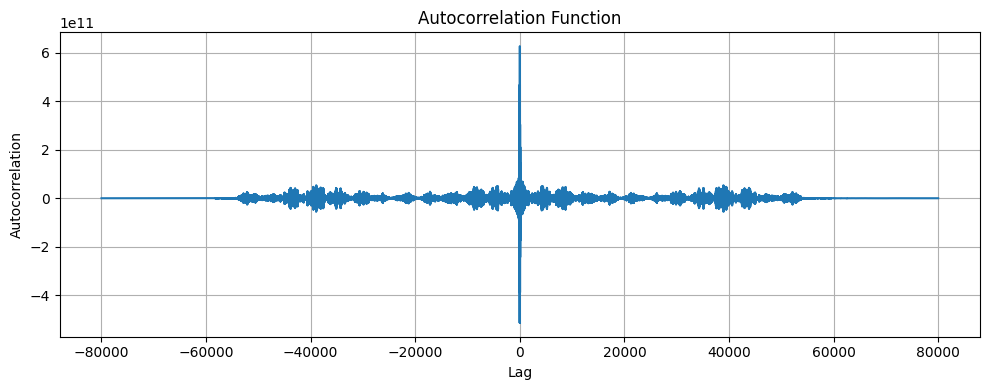

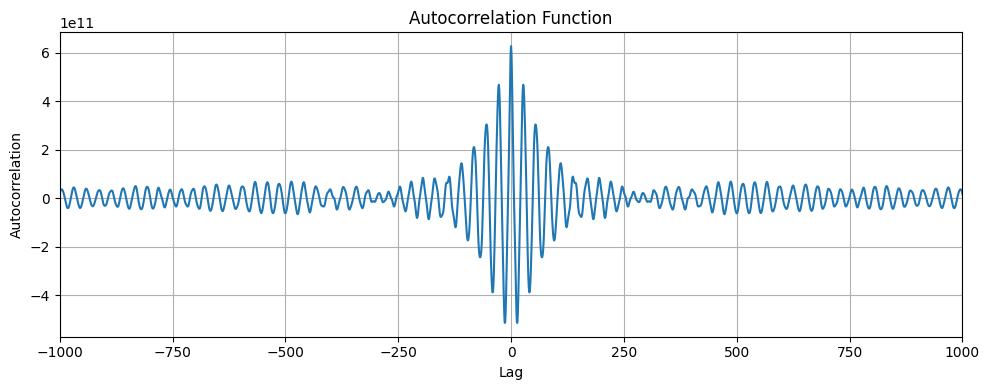

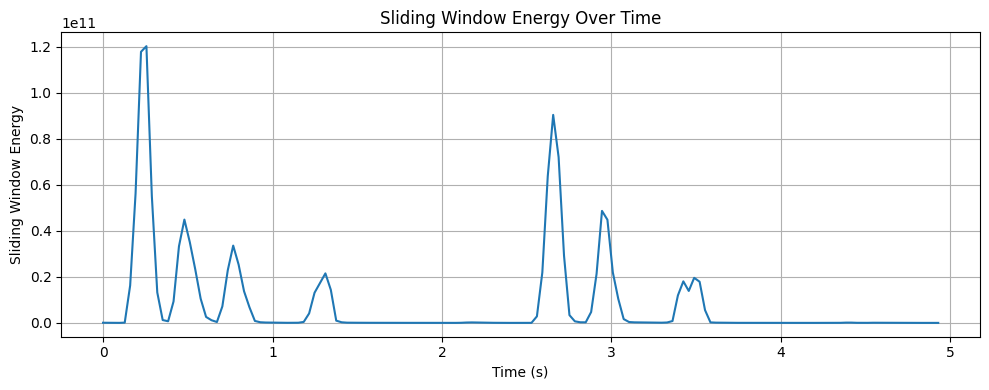

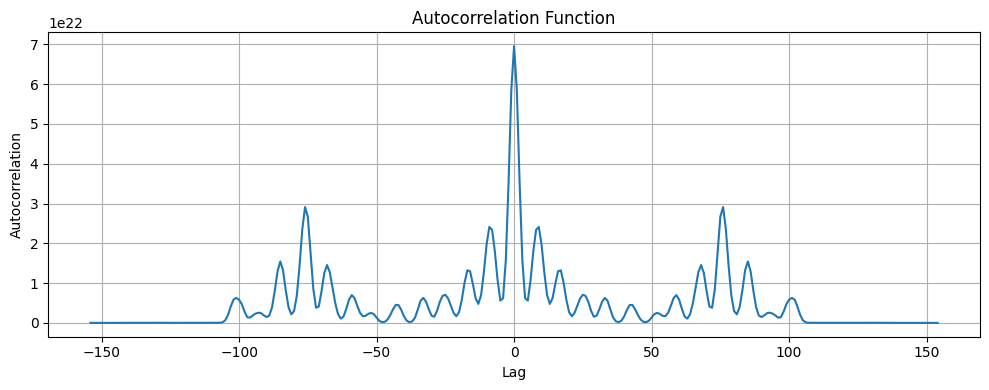

In [7]:
import os
import scipy.io
audio_root = "/lium/corpus/vrac/audio_tagging/ESC-50-master/audio"
fname = df_dog['filename'].iloc[data_indexx]
path = os.path.join(audio_root,fname)
audio = read_resample(path=path)
ipd.display(ipd.Audio(audio, rate=16000))

acf = periodicity(audio)
win_energy = sliding_window_energy(audio)

acf_env = periodicity(win_energy)

plot_acf(acf)
plot_acf(acf,lags_lim=(-1000,1000))
plot_sliding_window_energy(win_energy)
plot_acf(acf_env)

### Check for engine

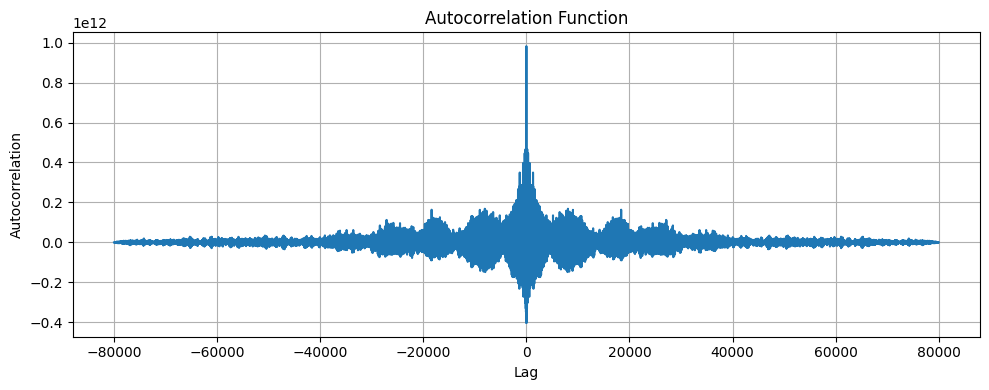

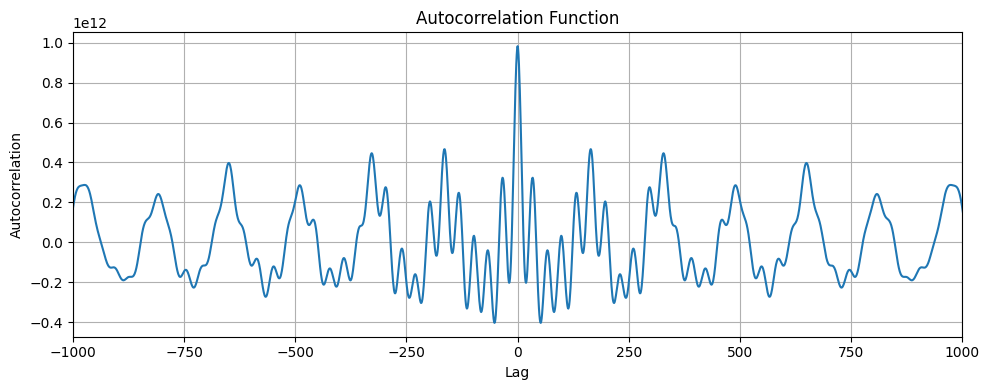

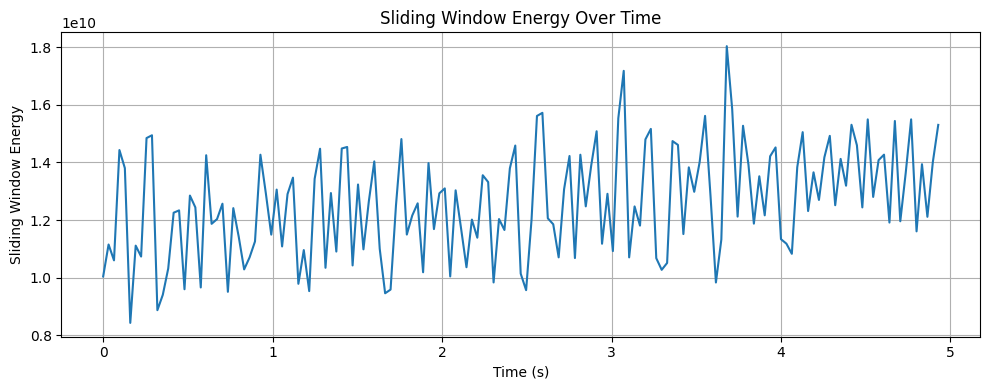

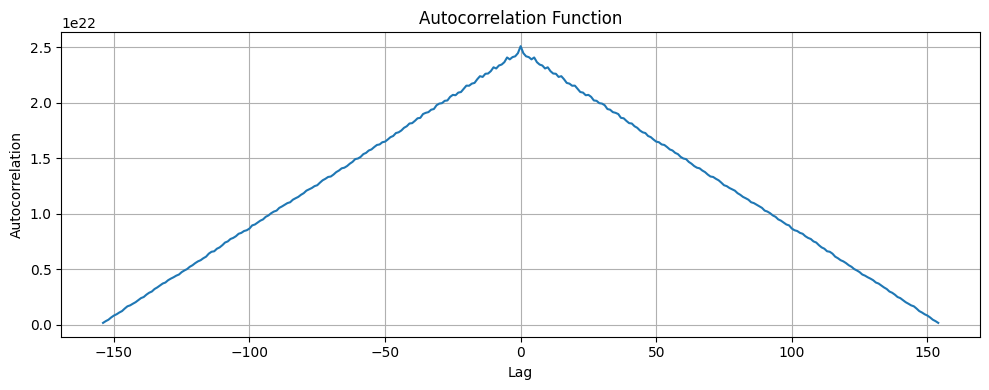

In [8]:
import os
import scipy.io
audio_root = "/lium/corpus/vrac/audio_tagging/ESC-50-master/audio"
fname = df_eng['filename'].iloc[data_indexx]
path = os.path.join(audio_root,fname)
audio = read_resample(path=path)
ipd.display(ipd.Audio(audio, rate=16000))

acf = periodicity(audio)
win_energy = sliding_window_energy(audio)
acf_env = periodicity(win_energy)

plot_acf(acf)
plot_acf(acf, lags_lim=(-1000,1000))
plot_sliding_window_energy(win_energy)
plot_acf(acf_env)

### Check for clapping

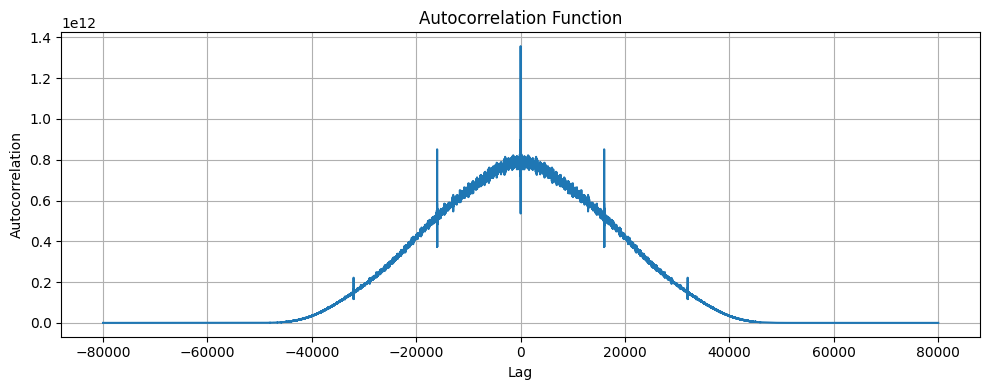

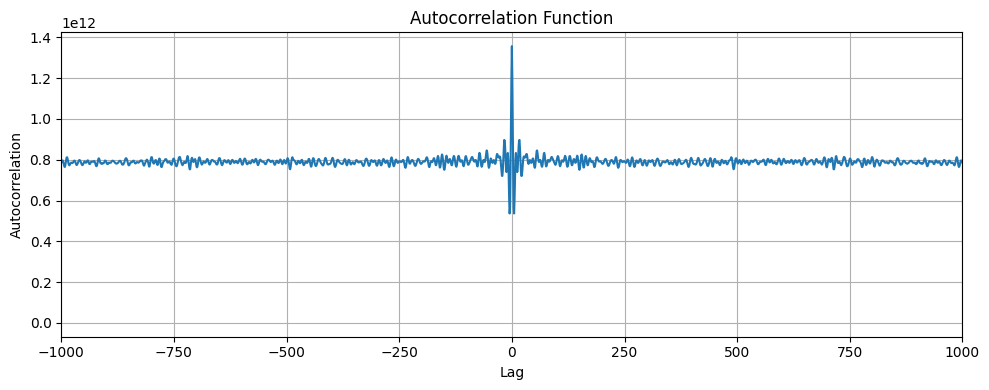

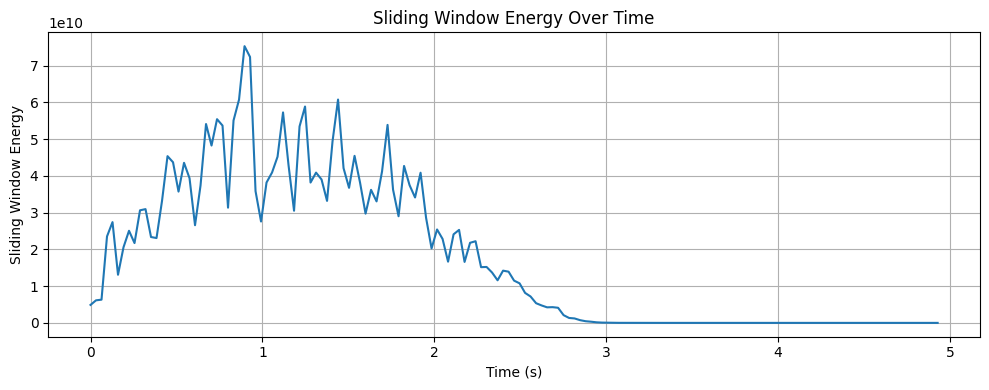

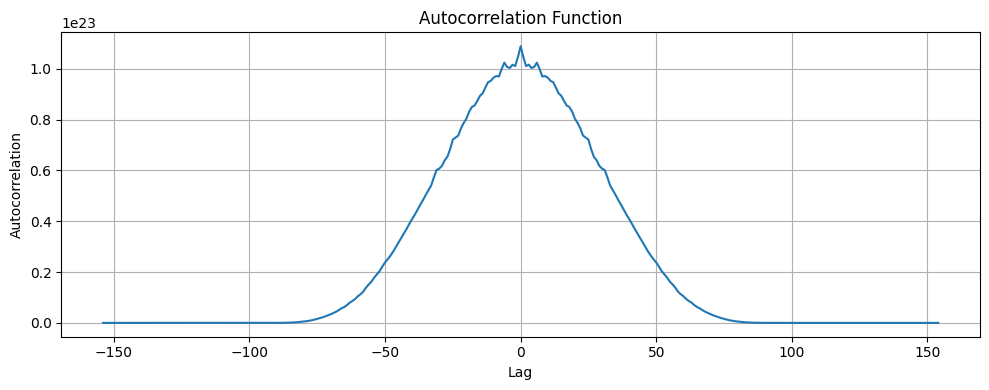

In [9]:
import os
import scipy.io
audio_root = "/lium/corpus/vrac/audio_tagging/ESC-50-master/audio"
fname = df_clap['filename'].iloc[data_indexx]
path = os.path.join(audio_root,fname)
audio = read_resample(path=path)
ipd.display(ipd.Audio(audio, rate=16000))

acf = periodicity(audio)
win_energy = sliding_window_energy(audio)
acf_env = periodicity(win_energy)

plot_acf(acf)
plot_acf(acf, lags_lim=(-1000,1000))
plot_sliding_window_energy(win_energy)
plot_acf(acf_env)

### Check for rain

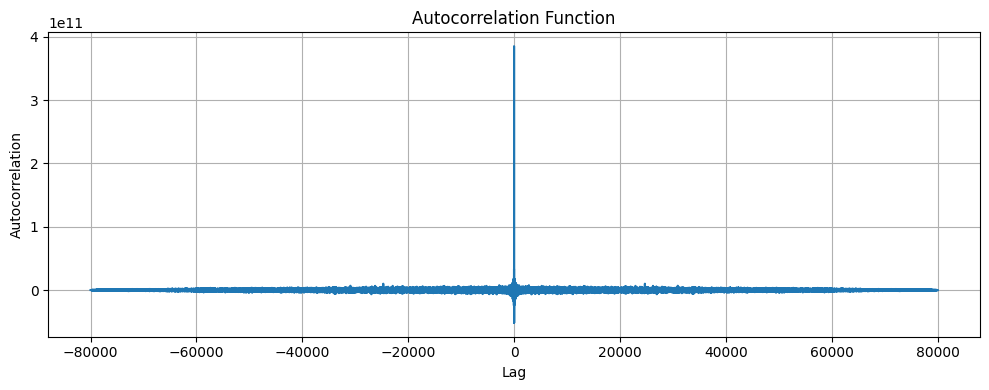

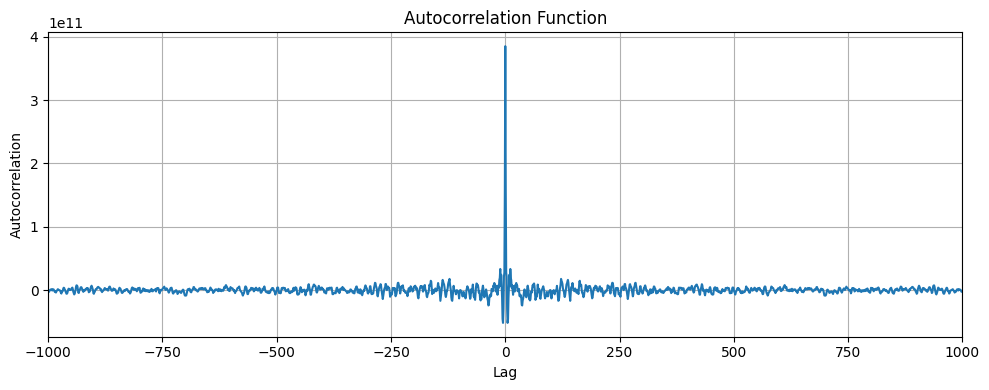

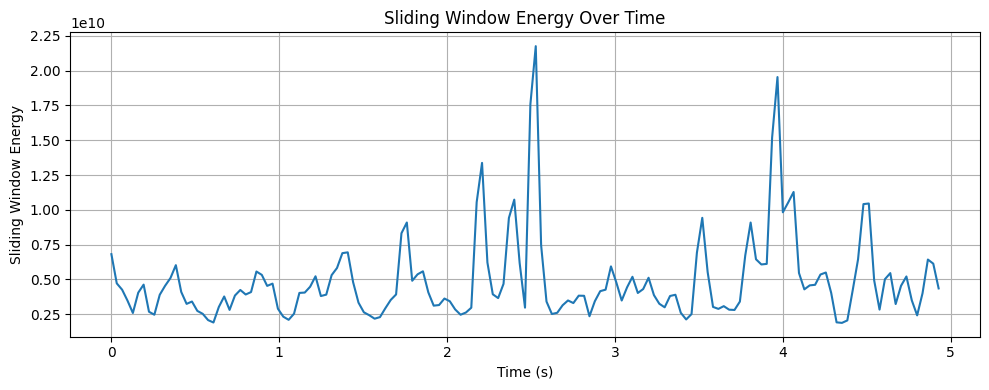

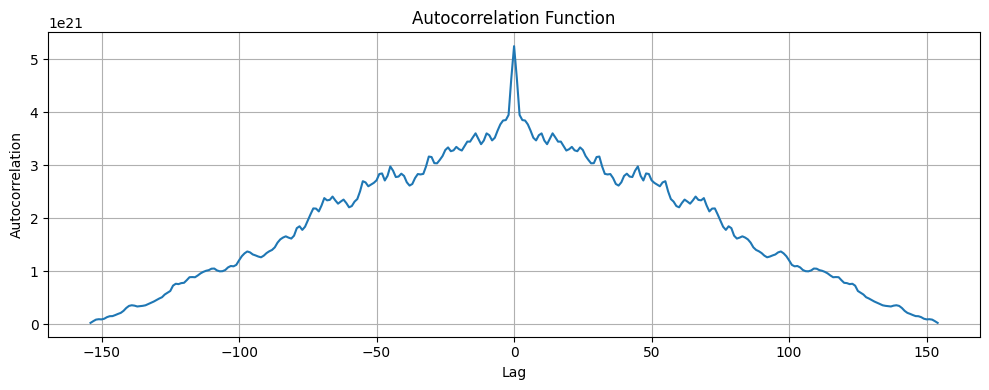

In [10]:
import os
import scipy.io
audio_root = "/lium/corpus/vrac/audio_tagging/ESC-50-master/audio"
fname = df_rain['filename'].iloc[data_indexx]
path = os.path.join(audio_root,fname)
audio = read_resample(path=path)


ipd.display(ipd.Audio(audio, rate=16000))
acf = periodicity(audio)
win_energy = sliding_window_energy(audio)
acf_env = periodicity(win_energy)

plot_acf(acf)
plot_acf(acf, lags_lim=(-1000,1000))
plot_sliding_window_energy(win_energy)
plot_acf(acf_env)

### Check hand saw

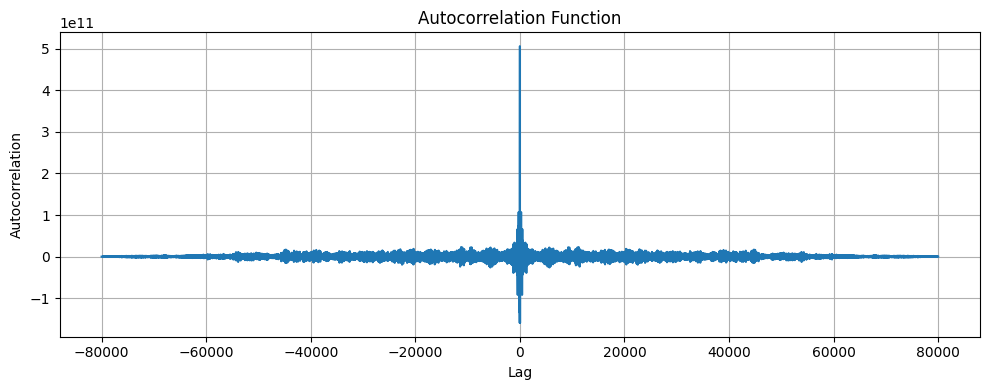

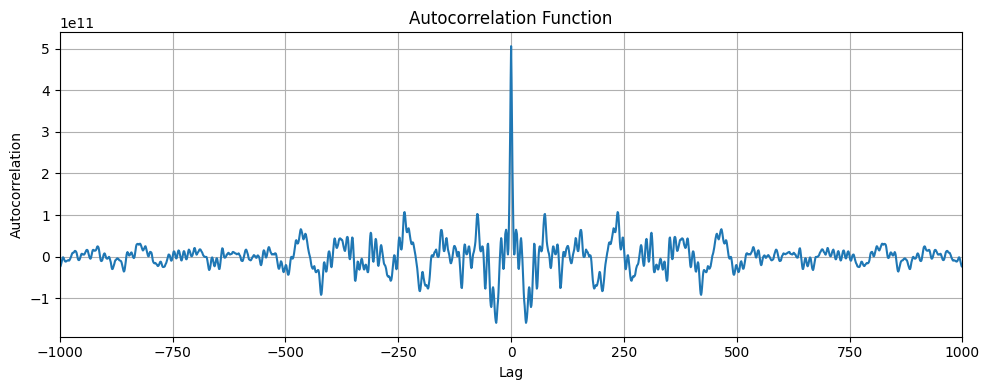

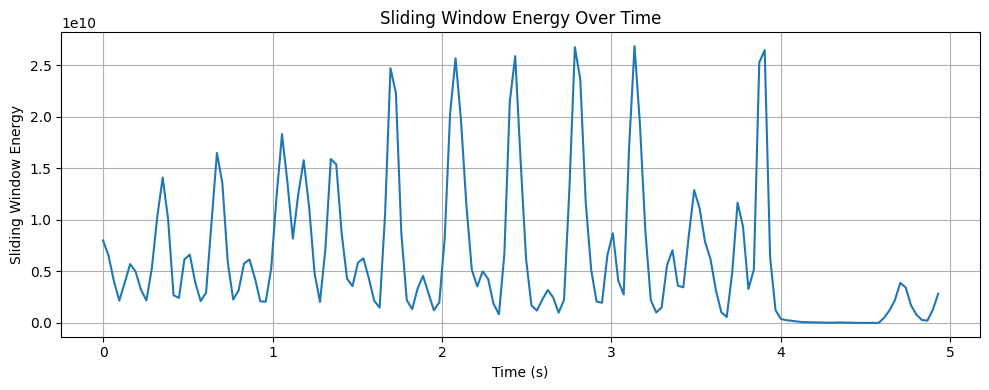

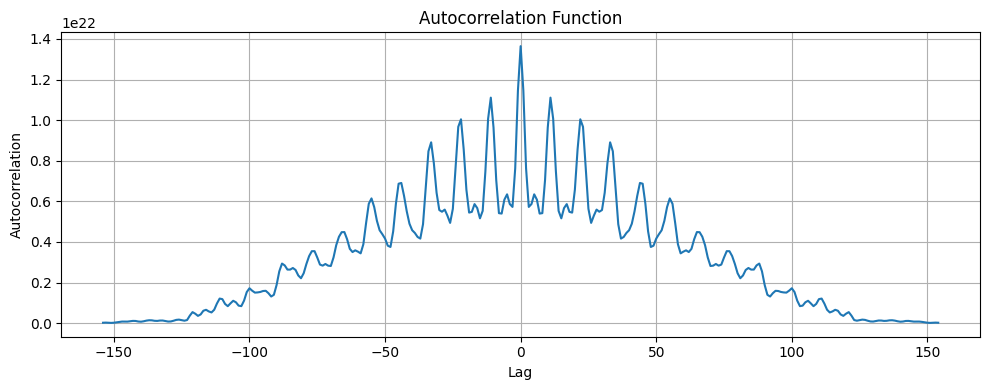

In [11]:
import os
import scipy.io

audio_root = "/lium/corpus/vrac/audio_tagging/ESC-50-master/audio"
fname = df_hand_saw['filename'].iloc[data_indexx]
path = os.path.join(audio_root,fname)
audio = read_resample(path=path)

ipd.display(ipd.Audio(audio, rate=16000))

acf = periodicity(audio)
win_energy = sliding_window_energy(audio)
acf_env = periodicity(win_energy)

plot_acf(acf)
plot_acf(acf, lags_lim=(-1000,1000))
plot_sliding_window_energy(win_energy)
plot_acf(acf_env)

### Check for clock

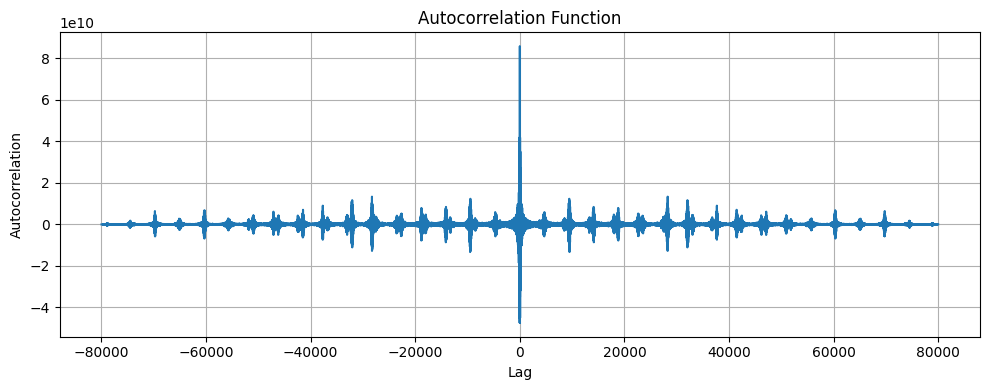

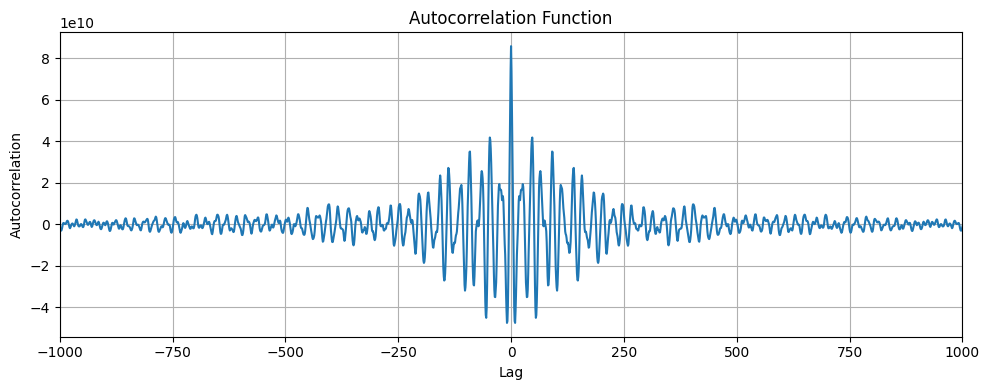

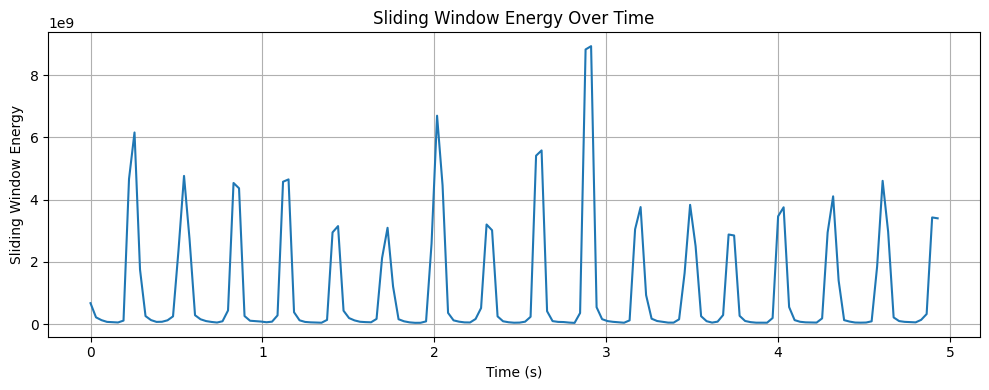

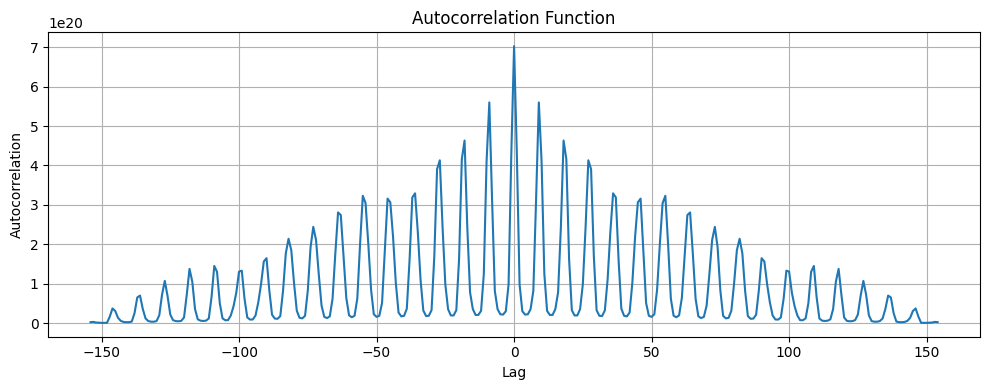

In [12]:
import os
import scipy.io

audio_root = "/lium/corpus/vrac/audio_tagging/ESC-50-master/audio"
fname = df_clock_tick['filename'].iloc[data_indexx]
path = os.path.join(audio_root,fname)
audio = read_resample(path=path)

ipd.display(ipd.Audio(audio, rate=16000))

acf = periodicity(audio)
win_energy = sliding_window_energy(audio)
acf_env = periodicity(win_energy)

plot_acf(acf)
plot_acf(acf, lags_lim=(-1000,1000))
plot_sliding_window_energy(win_energy)
plot_acf(acf_env)

### Check for helicopter

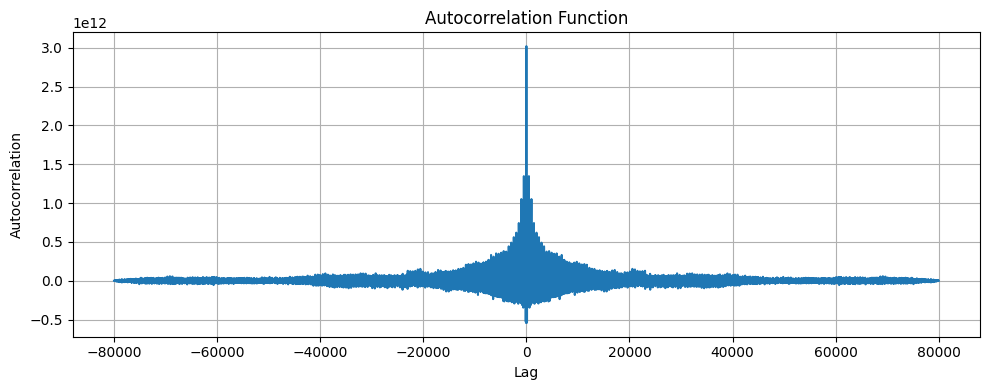

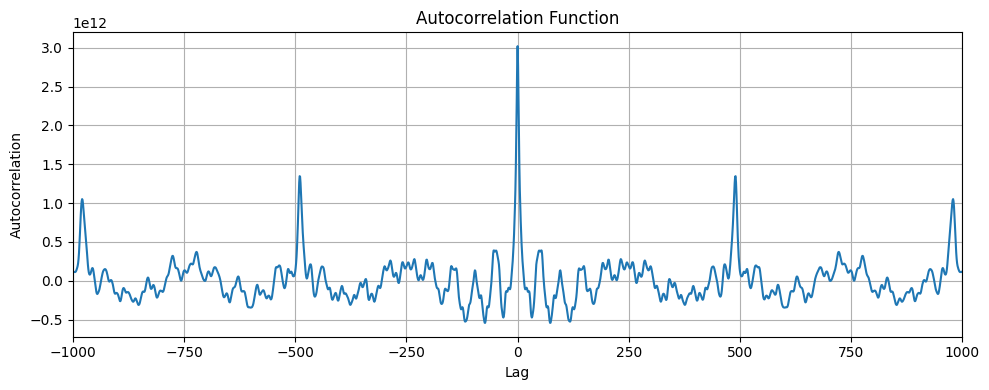

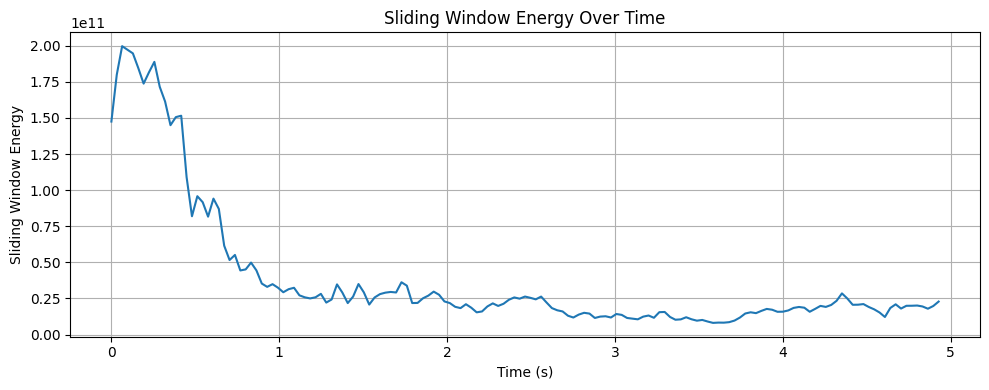

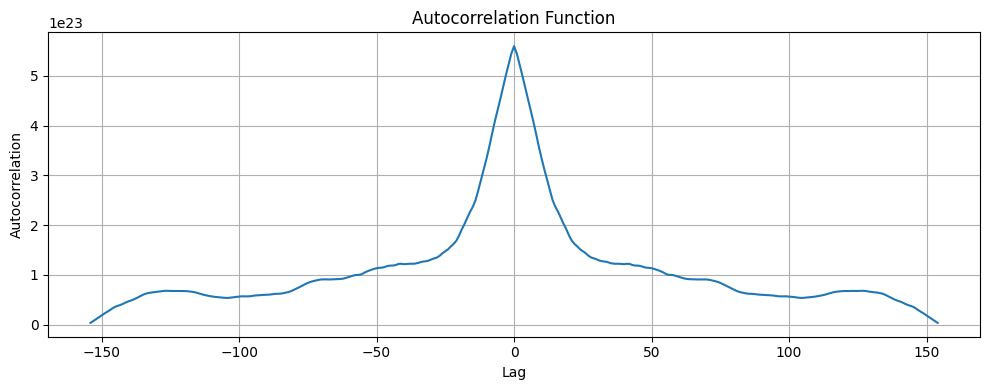

In [13]:
audio_root = "/lium/corpus/vrac/audio_tagging/ESC-50-master/audio"
fname = df_helicopter['filename'].iloc[data_indexx]
path = os.path.join(audio_root,fname)
audio = read_resample(path=path)

ipd.display(ipd.Audio(audio, rate=16000))

acf = periodicity(audio)
win_energy = sliding_window_energy(audio)
acf_env = periodicity(win_energy)

plot_acf(acf)
plot_acf(acf, lags_lim=(-1000,1000))
plot_sliding_window_energy(win_energy)
plot_acf(acf_env)